In [1]:
!pip install scalecast

You should consider upgrading via the 'C:\Users\Praveen Shahani\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


  Using cached tabulate-0.8.9-py3-none-any.whl (25 kB)
  Created wheel for scalecast: filename=SCALECAST-0.10.2-py3-none-any.whl size=63697 sha256=3c4ea456bfc1ace82a0e61dc37fad169302075abff64dd9ff47448415d6bb6d5
  Stored in directory: c:\users\praveen shahani\appdata\local\pip\cache\wheels\a6\4e\fb\c33010651b3f2da9ecf37d1841783c70d8914bfaf2de4f544f
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107749 sha256=bd73c568cc8f6f5754d2887a47242624562e78e1f67a51ada0e244a34bacd171
  Stored in directory: c:\users\praveen shahani\appdata\local\pip\cache\wheels\7b\26\a5\8460416695a992a2966b41caa5338e5e7fcea98c9d032d055c
Successfully built scalecast eli5


In [40]:
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
sns.mpl.rc("figure", figsize=(16, 6))

In [41]:
gross_data = pd.read_csv('https://raw.githubusercontent.com/tacookson/data/master/broadway-grosses/grosses.csv',parse_dates = ['week_ending'])
show_data = pd.read_csv('https://raw.githubusercontent.com/PSha98/Erdos-2022-project/main/Data_collection/show_info_1985-2019.csv')
CPI_data = pd.read_csv('https://raw.githubusercontent.com/PSha98/Erdos-2022-project/main/Data_collection/CPI_USBLS.csv', parse_dates = ['DATE'])

In [42]:
CPI_data = pd.read_csv('https://raw.githubusercontent.com/PSha98/Erdos-2022-project/main/Data_collection/CPI_USBLS.csv', parse_dates = ['DATE'])
CPI_data.rename(columns = {'CWSR0000SA0':'CPI'}, inplace = True)
gross_data['year'] = gross_data['week_ending'].dt.year
gross_data['month_c'] = [d.strftime('%b') for d in gross_data.week_ending]
gross_data['month'] = gross_data['week_ending'].dt.month
CPI_data['year'] = CPI_data['DATE'].dt.year
CPI_data['month']= CPI_data['DATE'].dt.month
gross_data

,week_ending,week_number,weekly_gross_overall,show,theatre,weekly_gross,potential_gross,avg_ticket_price,top_ticket_price,seats_sold,seats_in_theatre,pct_capacity,performances,previews,year,month_c,month
0,1985-06-09,1,3915937.00,42nd Street,St. James Theatre,282368.00,NaN,30.42,NaN,9281,1655,0.7010,8,0,1985,Jun,6
1,1985-06-09,1,3915937.00,A Chorus Line,Sam S. Shubert Theatre,222584.00,NaN,27.25,NaN,8167,1472,0.6935,8,0,1985,Jun,6
2,1985-06-09,1,3915937.00,Aren't We All?,Brooks Atkinson Theatre,249272.00,NaN,33.75,NaN,7386,1088,0.8486,8,0,1985,Jun,6
3,1985-06-09,1,3915937.00,Arms and the Man,Circle in the Square Theatre,95688.00,NaN,20.87,NaN,4586,682,0.8405,8,0,1985,Jun,6
4,1985-06-09,1,3915937.00,As Is,Lyceum Theatre,61059.00,NaN,20.78,NaN,2938,684,0.5369,8,0,1985,Jun,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47519,2020-03-01,40,26109896.25,The Phantom of the Opera,Majestic Theatre,639215.93,1358986.0,72.18,213.0,8856,1605,0.6897,8,0,2020,Mar,3
47520,2020-03-01,40,26109896.25,Tina: The Tina Turner Musical,Lunt-Fontanne Theatre,1320766.00,1566688.0,132.02,297.0,10004,1478,0.8461,8,0,2020,Mar,3
47521,2020-03-01,40,26109896.25,To Kill A Mockingbird,Sam S. Shubert Theatre,1132278.54,1549625.0,115.41,423.0,9811,1435,0.9767,7,0,2020,Mar,3
47522,2020-03-01,40,26109896.25,West Side Story,Broadway Theatre,1598947.32,1722464.0,114.87,373.0,13920,1740,1.0000,8,0,2020,Mar,3


In [43]:
CPI_data['CPI'] = CPI_data.iloc[-1]['CPI']/CPI_data['CPI']
CPI_data

,DATE,CPI,year,month
0,1947-01-01,13.148889,1947,1
1,1947-02-01,13.064213,1947,2
2,1947-03-01,12.839783,1947,3
3,1947-04-01,12.839783,1947,4
4,1947-05-01,12.863043,1947,5
...,...,...,...,...
899,2021-12-01,1.031327,2021,12
900,2022-01-01,1.024507,2022,1
901,2022-02-01,1.015750,2022,2
902,2022-03-01,1.001908,2022,3


In [44]:
CPI_data2 = CPI_data[['CPI','month','year']]
gross_data2 = gross_data.merge(CPI_data2, how = 'left', on = ['month', 'year'])
gross_data['weekly_gross_overall'] = gross_data2['weekly_gross_overall']*gross_data2['CPI']
gross_data['weekly_gross'] = gross_data2['weekly_gross']*gross_data2['CPI']
gross_data['avg_ticket_price'] = gross_data2['avg_ticket_price']*gross_data2['CPI']
gross_data['potential_gross'] = gross_data2['potential_gross']*gross_data2['CPI']
gross_data['top_ticket_price']= gross_data2['top_ticket_price']*gross_data2['CPI']
gross_data['year']=gross_data.year.astype(int).astype(str)
gross_data


,week_ending,week_number,weekly_gross_overall,show,theatre,weekly_gross,potential_gross,avg_ticket_price,top_ticket_price,seats_sold,seats_in_theatre,pct_capacity,performances,previews,year,month_c,month
0,1985-06-09,1,1.040401e+07,42nd Street,St. James Theatre,7.502061e+05,NaN,80.821017,NaN,9281,1655,0.7010,8,0,1985,Jun,6
1,1985-06-09,1,1.040401e+07,A Chorus Line,Sam S. Shubert Theatre,5.913697e+05,NaN,72.398840,NaN,8167,1472,0.6935,8,0,1985,Jun,6
2,1985-06-09,1,1.040401e+07,Aren't We All?,Brooks Atkinson Theatre,6.622754e+05,NaN,89.668288,NaN,7386,1088,0.8486,8,0,1985,Jun,6
3,1985-06-09,1,1.040401e+07,Arms and the Man,Circle in the Square Theatre,2.542275e+05,NaN,55.448213,NaN,4586,682,0.8405,8,0,1985,Jun,6
4,1985-06-09,1,1.040401e+07,As Is,Lyceum Theatre,1.622239e+05,NaN,55.209097,NaN,2938,684,0.5369,8,0,1985,Jun,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47519,2020-03-01,40,2.949006e+07,The Phantom of the Opera,Majestic Theatre,7.219681e+05,1.534919e+06,81.524345,240.574751,8856,1605,0.6897,8,0,2020,Mar,3
47520,2020-03-01,40,2.949006e+07,Tina: The Tina Turner Musical,Lunt-Fontanne Theatre,1.491751e+06,1.769510e+06,149.111167,335.449300,10004,1478,0.8461,8,0,2020,Mar,3
47521,2020-03-01,40,2.949006e+07,To Kill A Mockingbird,Sam S. Shubert Theatre,1.278862e+06,1.750238e+06,130.350854,477.761125,9811,1435,0.9767,7,0,2020,Mar,3
47522,2020-03-01,40,2.949006e+07,West Side Story,Broadway Theatre,1.805945e+06,1.945452e+06,129.740947,421.288179,13920,1740,1.0000,8,0,2020,Mar,3


In [45]:
df = gross_data[['seats_sold','week_ending','year','month']]
df2 = df.groupby(['month','year']).sum().reset_index()
df2

,month,year,seats_sold
0,1,1986,537301
1,1,1987,479118
2,1,1988,742268
3,1,1989,746674
4,1,1990,572650
...,...,...,...
413,12,2015,833895
414,12,2016,1061842
415,12,2017,1315511
416,12,2018,1614976


In [46]:
cols = ['year','month','day']
df2['day'] = [1 for _ in range(df2.shape[0])]
df2['date'] = df2[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")
df2['date']=pd.to_datetime(df2['date'])
df3 = df2[['date','seats_sold']]
df3.set_index(['date'], inplace = True)
y = df3.seats_sold
y = seats_sold.asfreq("MS")


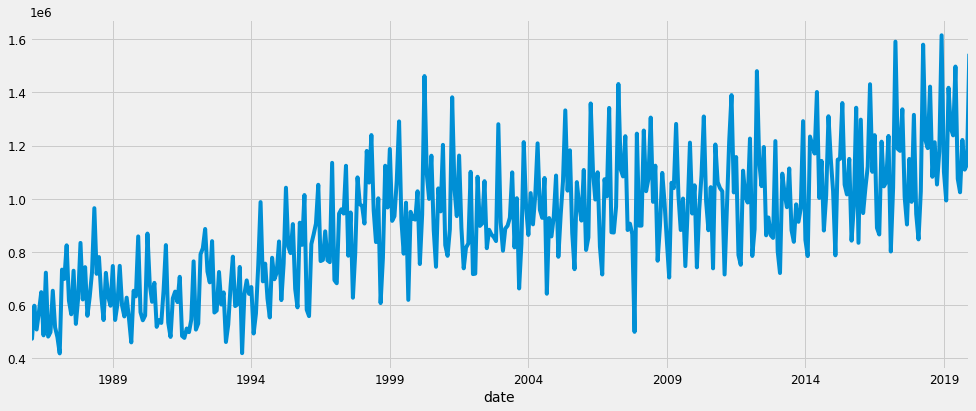

In [47]:
y.plot(figsize=(15, 6))
plt.show()

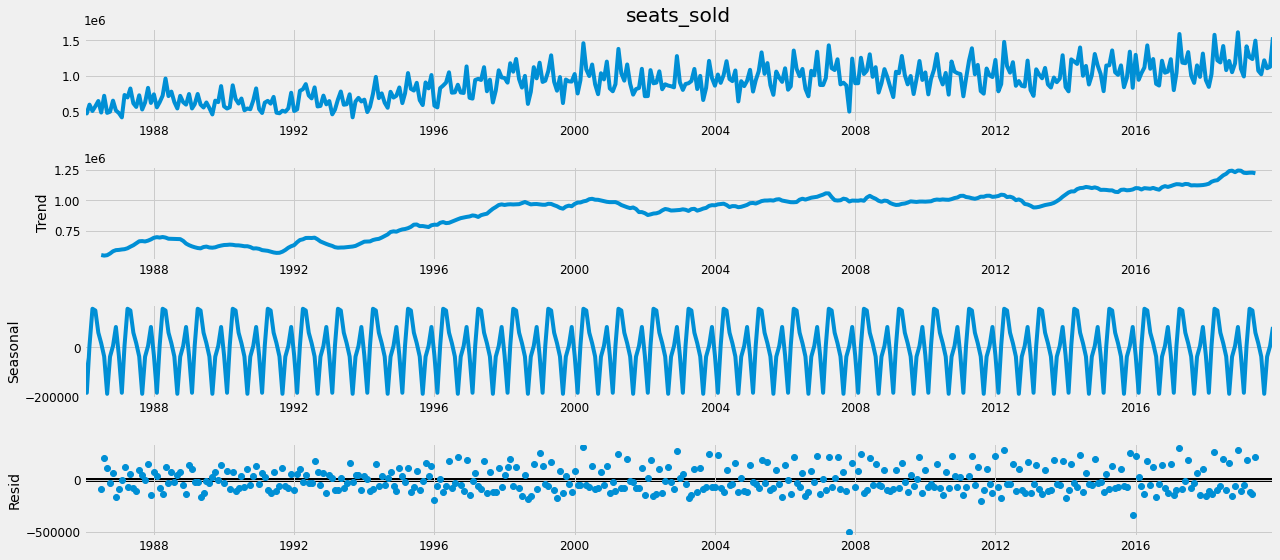

In [15]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [16]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [20]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:12350.563790477014
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:11739.144782312747
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:10617.108007349203
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:10276.20541924363
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:10644.563833478744
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:10619.113753457703
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:10316.04027766719
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:10264.213020280511
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:12060.425139162797
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:11630.281516192998
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:10589.788836919131
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:10245.470798201368
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:11636.481345152699
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:11579.563448012676
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:10312.174926335829
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:10235.82908561345
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:11171.991761119205
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:10765.76546151

In [21]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2671      0.064     -4.161      0.000      -0.393      -0.141
ma.L1         -0.8453      0.038    -22.094      0.000      -0.920      -0.770
ar.S.L12      -0.2444      0.060     -4.090      0.000      -0.362      -0.127
sigma2      3.328e+10   2.09e-13    1.6e+23      0.000    3.33e+10    3.33e+10


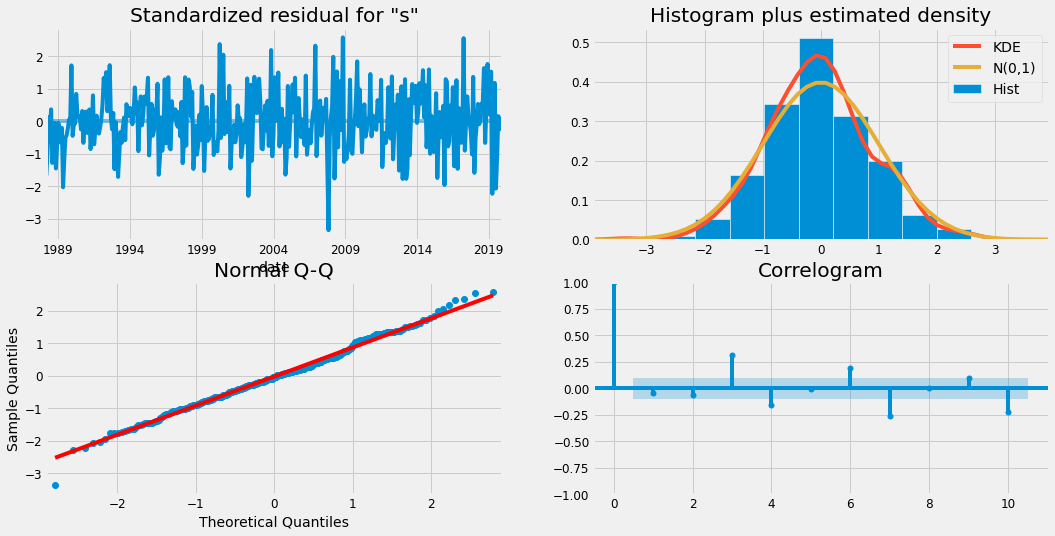

In [22]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

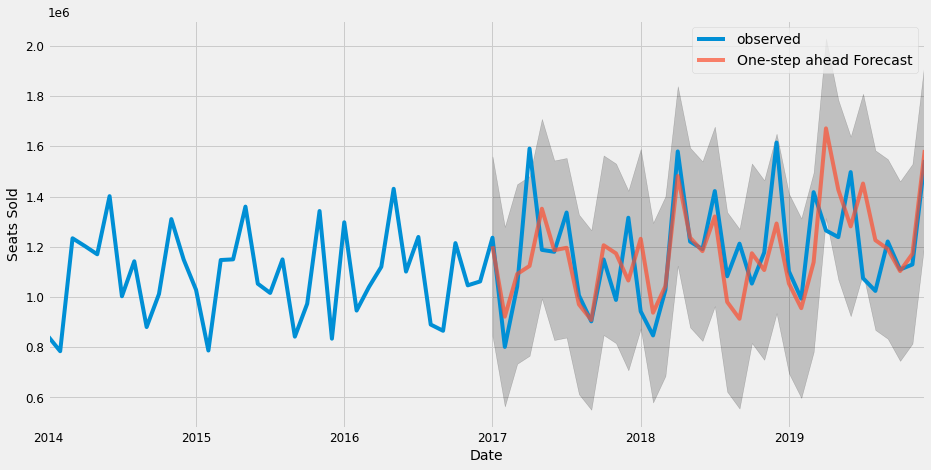

In [50]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Seats Sold')
plt.legend()
plt.show()

In [51]:
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 34351375091.78


In [52]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 185341.24


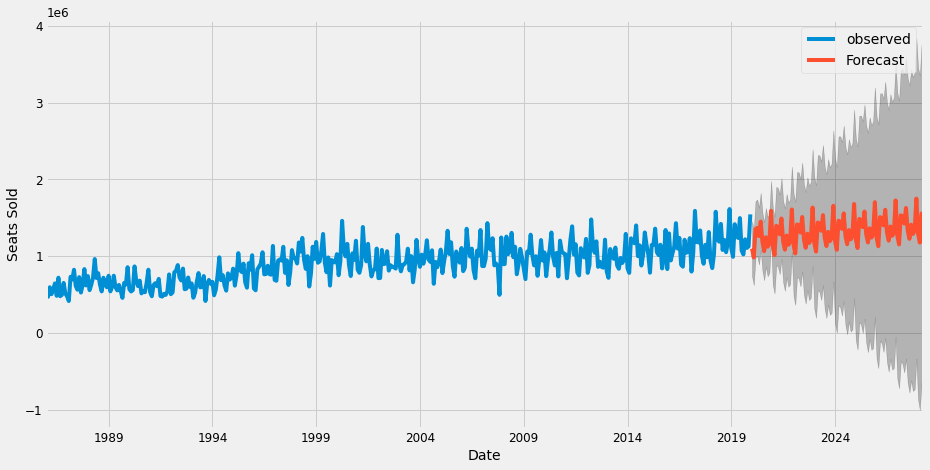

In [53]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Seats Sold')
plt.legend()
plt.show()